### Import dependencies

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np

### Set up training data

In [3]:
celsius_q = np.array([-40,-10,0,8,15,22,38],dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100],dtype=float)

In [4]:
for i, c in enumerate(celsius_q):
    print("{} degree Celsius = {} degree Fahrenheit".format(c,fahrenheit_a[i]))

-40.0 degree Celsius = -40.0 degree Fahrenheit
-10.0 degree Celsius = 14.0 degree Fahrenheit
0.0 degree Celsius = 32.0 degree Fahrenheit
8.0 degree Celsius = 46.0 degree Fahrenheit
15.0 degree Celsius = 59.0 degree Fahrenheit
22.0 degree Celsius = 72.0 degree Fahrenheit
38.0 degree Celsius = 100.0 degree Fahrenheit


### Creat the model

#### Build a layer

In [5]:
l0 = tf.keras.layers.Dense(units=1,input_shape=[1])
# Dense：由这里声明的单个密集层组成
# input_shape=[1]:  输入数据的shape
# units=1: 指定这个层级有多少个变量

In [6]:
# 创建一个包含一个l0层级的模型
model = tf.keras.Sequential([l0])
# 也可以像下面这样，直接在顺序语句中内嵌层级声明
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])

### Compile the model,with loss and optimizer functions

In [7]:
# 编译模型的损失函数(均方误差)和优化函数(Adma)
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
# 这里的0.1为学习率，可调，一般范围为0.1~0.001

### Train the model

In [8]:
hiatory = model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
# 调用fit方法训练模型；传入数据；epoch称为周期，指对我们的样本迭代多少次；
print("Finished training the model")

Finished training the model


### Display training statistics

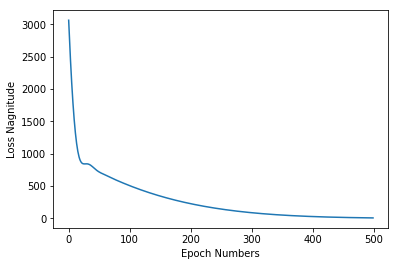

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Numbers")
plt.ylabel("Loss Nagnitude")
plt.plot(hiatory.history['loss'])

### Use the model to predict values

In [11]:
print(model.predict([100.0]))

[[211.32164]]


### Looking at the layer weights

In [12]:
# 查看密集层的权重
print("These are the layer variables:{}".format(l0.get_weights()))

These are the layer variables:[array([[0.6369339]], dtype=float32), array([0.], dtype=float32)]


### A little experiment（尝试三个密集层）

In [17]:
# 前两个层级分别有4个单元，最后一个有一个单元
l0 = tf.keras.layers.Dense(units=4,input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degree Celsius is : {} degree Fahrenheit".format(model.predict([100.0])))
print("These are the 10 variables:{}".format(l0.get_weights()))
print("These are the 11 variables:{}".format(l1.get_weights()))
print("These are the 12 variables:{}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degree Celsius is : [[211.74742]] degree Fahrenheit
These are the 10 variables:[array([[ 0.06837003, -0.22703896, -0.24282087,  0.8163076 ]],
      dtype=float32), array([-2.806716 ,  2.2954237, -3.3367841,  3.47819  ], dtype=float32)]
These are the 11 variables:[array([[ 0.5231544 , -1.1123953 ,  0.59429264, -0.21537642],
       [-0.6976013 ,  0.4008302 ,  0.48398033, -0.17010051],
       [ 1.1972291 , -0.28453034,  0.28607443, -0.76825523],
       [-0.65101266,  1.4254705 ,  0.12602344, -0.45794746]],
      dtype=float32), array([-3.2313702,  3.4970148, -1.9945815, -1.3138908], dtype=float32)]
These are the 12 variables:[array([[-1.156428  ],
       [ 0.971588  ],
       [-0.38722622],
       [-0.13753551]], dtype=float32), array([3.1570802], dtype=float32)]
